In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn import set_config
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
set_config(display="diagram")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Kaggle/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Read data

In [2]:
df = pd.read_csv('/Kaggle/titanic/train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


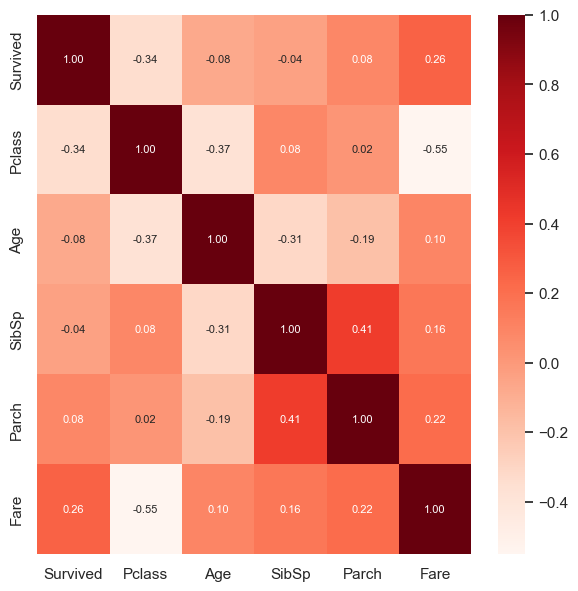

In [3]:
# Matrix of correlation between features
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds, fmt='.2f',annot_kws={"fontsize":8})
plt.show()

In [4]:
describe_df = df.describe()
describe_df

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Data preprocessing and data exploration

We take account the Pclass, Sex, Age, SibSp, Parch, Fare, Embarked features.

In [6]:
new_df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [7]:
new_df["Sex"] = new_df["Sex"].map({
    'male': 0,
    'female': 1
})

In [8]:
new_df["Age"] = new_df["Age"].fillna(np.random.normal(describe_df["Age"]["mean"], describe_df["Age"]["std"]))
new_df["Embarked"] = new_df["Embarked"].fillna('S')

In [9]:
# Unique values in Embarked
new_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
new_df["Embarked"] = oe.fit_transform(new_df[['Embarked']])
new_df['Age'].describe()

count    891.000000
mean      33.121931
std       14.709359
min        0.420000
25%       22.000000
50%       32.000000
75%       46.929212
max       80.000000
Name: Age, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
new_df['Age'] = norm.fit_transform(new_df['Age'].values.reshape(-1, 1))
new_df['Age']

PassengerId
1      0.271174
2      0.472229
3      0.321438
4      0.434531
5      0.434531
         ...   
887    0.334004
888    0.233476
889    0.584433
890    0.321438
891    0.396833
Name: Age, Length: 891, dtype: float64

In [12]:
new_df['Fare'] = norm.fit_transform(new_df['Fare'].values.reshape(-1, 1))
new_df['Fare']

PassengerId
1      0.014151
2      0.139136
3      0.015469
4      0.103644
5      0.015713
         ...   
887    0.025374
888    0.058556
889    0.045771
890    0.058556
891    0.015127
Name: Fare, Length: 891, dtype: float64

## Split data into train and test

In [13]:
X = new_df.drop(['Survived'], axis=1)
y = new_df['Survived']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(712, 7)

## Neural network

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential(
    [
        Dense(units=X_train.shape[1], activation="sigmoid"),
        Dense(units=1, activation="sigmoid"),
    ], name="titanic_model"
)

In [17]:
model.build(input_shape=(None, X_train.shape[1]))

In [18]:
model.summary()

Model: "titanic_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [19]:
[layer1, layer2] = model.layers

In [20]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")

W1 shape = (7, 7), b1 shape = (7,)
W2 shape = (7, 1), b2 shape = (1,)


In [21]:
print(model.layers[1].weights)

[<tf.Variable 'dense_1/kernel:0' shape=(7, 1) dtype=float32, numpy=
array([[-0.14399076],
       [-0.10579467],
       [-0.11810416],
       [ 0.09500605],
       [ 0.31687564],
       [ 0.33540398],
       [ 0.79127866]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [22]:
X_train_numpy = np.array(X_train)
y_train_numpy = np.array(y_train)
X_train_numpy.shape

(712, 7)

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train_numpy, y_train_numpy,
    epochs=1000
)

## Predictions

In [24]:
X_test_numpy = np.array(X_test)
y_test_numpy = np.array(y_test)

In [25]:
model.evaluate(X_test_numpy, y_test_numpy)

6/6 [==============================] - 0s 2ms/step - loss: 0.4212


0.4211694598197937

In [26]:
y_pred = model.predict(X_test_numpy)

6/6 [==============================] - 0s 2ms/step


In [27]:
# threshold = 0.5
y_pred = np.reshape(y_pred, (y_pred.shape[0],))
y_pred = np.where(y_pred > 0.5, 1, 0)

In [28]:
# score
1 - abs(y_test_numpy - y_pred).sum() / len(y_test_numpy)

0.8100558659217877

## Submission

In [29]:
test_df = pd.read_csv('/Kaggle/titanic/test.csv', index_col='PassengerId')
describe_test_df = test_df.describe()
describe_test_df

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [30]:
test_df["Sex"] = test_df["Sex"].map({
    'male': 0,
    'female': 1
})

In [31]:
test_df["Age"] = test_df["Age"].fillna(np.random.normal(describe_test_df["Age"]["mean"], describe_test_df["Age"]["std"]))
test_df["Fare"] = test_df["Fare"].fillna(np.random.normal(describe_test_df["Fare"]["mean"], describe_test_df["Fare"]["std"]))
test_df["Embarked"] = test_df["Embarked"].fillna('S')

In [32]:
test_df["Embarked"] = oe.fit_transform(test_df[['Embarked']])
test_df['Age'] = norm.fit_transform(test_df['Age'].values.reshape(-1, 1))
test_df['Fare'] = norm.fit_transform(test_df['Fare'].values.reshape(-1, 1))
test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,0.413250,0.447368,0.392344,0.069399,1.401914
std,0.841838,0.481622,0.169665,0.896760,0.981429,0.109031,0.854496
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.301068,0.000000,0.000000,0.015412,1.000000
50%,3.000000,0.000000,0.419755,0.000000,0.000000,0.028213,2.000000
75%,3.000000,1.000000,0.476082,1.000000,0.000000,0.061429,2.000000
max,3.000000,1.000000,1.000000,8.000000,9.000000,1.000000,2.000000


In [33]:
X_submit_test = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [34]:
test_df["Survived"] = model.predict(X_submit_test)
test_df["Survived"].shape

14/14 [==============================] - 0s 2ms/step


(418,)

In [35]:
test_df["Survived"] = np.where(test_df["Survived"] > 0.5, 1, 0)

In [36]:
submission = test_df[["Survived"]]
submission.to_csv("submission.csv")
print("Your submission was successfully saved!")

Your submission was successfully saved!
